## Extraction classes

# Génération documentation ontologie

In [2]:
import rdflib
from rdflib import RDF, OWL

In [63]:
g = rdflib.Graph()
result = g.parse("/home/mbunel/Documents/Ontologie/RelationsSpatiales/Relations_spatiales 8.owl")

In [142]:
import sys
import rdflib

class classDescriptor:
    
    def __init__(self, graph, uriClass):
        
        self.subClassUri = rdflib.term.URIRef('http://www.w3.org/2000/01/rdf-schema#subClassOf')
        
        uriClassList = classes_rel_spa = list(g.subjects(self.subClassUri, uriClass))
        self.descriptor = { k:{'url':k} for k in uriClassList}
        
        for i in uriClassList:
            self.descriptor[i]['label'] = list(g.objects(i, rdflib.term.URIRef('http://www.w3.org/2000/01/rdf-schema#label')))
            self.descriptor[i]['description'] = list(g.objects(i, rdflib.term.URIRef('http://www.w3.org/2000/01/rdf-schema#comment')))
        
    def out(self):
        
        lines = []
        for k,v in self.descriptor.items():
            for l in v['label']:
                lines.append("%s" % l.toPython())
            lines.append("/n")
            lines.append("/t%s/n" % v['url'])

            for d in v['description']:
                lines.append("%s/n" % d.toPython())
            lines.append("/n")
        return lines
    
        for l in lines:
            sys.stdout.write(l)
            
        sys.stdout.flush()
        sys.exit(0)
        
        
if __name__ == "__main__":
    
    path = sys.argv[0]
    
    g = rdflib.Graph()
    result = g.parse(path)
    
    tpe = rdflib.term.URIRef('http://www.semanticweb.org/mbunel/ontologies/Ornitho#Relation_spatiale')
    aa = classDescriptor(g, tpe)
    aa.out()

SAXParseException: file:///usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1:2: not well-formed (invalid token)

In [27]:
list(g.predicate_objects(rdflib.term.URIRef('http://www.semanticweb.org/mbunel/ontologies/Ornitho#DeAutreCoteDeParRapportA')))

[(rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'),
  rdflib.term.URIRef('http://www.w3.org/2002/07/owl#Class')),
 (rdflib.term.URIRef('http://www.w3.org/2000/01/rdf-schema#label'),
  rdflib.term.Literal("De l'autre côté de par rapport à", lang='fr')),
 (rdflib.term.URIRef('http://www.w3.org/2000/01/rdf-schema#subClassOf'),
  rdflib.term.URIRef('http://www.semanticweb.org/mbunel/ontologies/Ornitho#Relation_spatiale'))]

In [119]:
tpe = rdflib.term.URIRef('http://www.semanticweb.org/mbunel/ontologies/Ornitho#Relation_spatiale')

In [137]:
aa = classDescriptor(g, tpe)

In [138]:
aa.out()

["À l'est de",
 '/n',
 'http://www.semanticweb.org/mbunel/ontologies/Ornitho#AEstDe/n',
 'La cible se situe globalement à l’est du site, sans préciser si elle est à dans la partie est du site ou disjointe du site et à l’est de lui./n',
 '/n',
 'Au sud de',
 '/n',
 'http://www.semanticweb.org/mbunel/ontologies/Ornitho#AuSudDe/n',
 '/n',
 'À la même altitude que',
 '/n',
 'http://www.semanticweb.org/mbunel/ontologies/Ornitho#ALaMemeAltitudeQue/n',
 'La cible est située à la même altitude que le site. Le site peut être une altitude absolue (=> donc plus ou moins une courbe de niveau ou un «\xa0plan de niveau\xa0»), ou un objet dont l’altitude sert donc de référence./n',
 '/n',
 "Au dessus d'une altitude",
 '/n',
 'http://www.semanticweb.org/mbunel/ontologies/Ornitho#AuDessusDeAltitude/n',
 'La cible a une altitude supérieure à celle du site. La distance entre le site est la cible n’est pas contraignante./n',
 '/n',
 'Distance quantitative planimétrique',
 '/n',
 'http://www.semanticweb.or

In [109]:
test = rdflib.term.Literal("De l'autre côté de par rapport à", lang='fr')

In [111]:
test.toPython()

"De l'autre côté de par rapport à"

# Calcul distance

In [20]:
import numpy as np
import scipy.ndimage
import matplotlib.pyplot as pyplot

In [14]:
data = np.load("/home/mbunel/Bureau/out.npy")
data_lite = np.load("/home/mbunel/Bureau/out_lite.npy")

In [15]:
data_lite.shape

(1, 309, 300)

Première implémentation, très lente

In [24]:
def computeV1(data):

    computeraster = np.empty_like(data)
    notnullcells = np.argwhere(data != 0)

    # Définition de l'itérateur
    it = np.nditer(data, flags=['multi_index'])
    while not it.finished:
        # Calcul de la distance au plus proche voisin
        computeraster[it.multi_index] = np.sqrt(
            np.min(np.sum(np.square(notnullcells - it.multi_index), axis=1)))
        it.iternext()

    return computeraster

In [25]:
compute_lite = computeV1(data_lite)

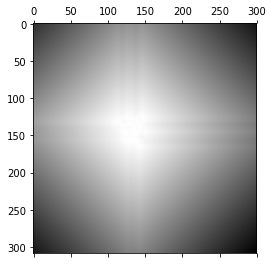

In [28]:
pyplot.matshow(compute_lite[0], cmap='gray')

Implémentation avec dilatation

In [26]:
def computeV2(data):

    aa = np.zeros_like(data)
    bb = data + aa

    i = 0
    
    while np.min(bb) == 0:
        scipy.ndimage.binary_dilation(bb, output=aa)
        bb = bb + aa
        i += 1
    
    print("Done in % iterations" % i)
    computeraster = (np.max(bb) - bb)

    return computeraster

In [27]:
compute_lite = computeV2(data_lite)

Done in  4terations


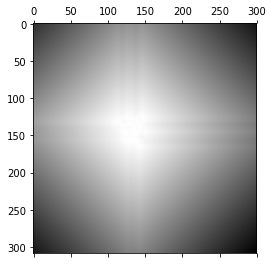

In [23]:
pyplot.matshow(compute_lite[0], cmap='gray')

In [46]:
from functools import reduce, partial
from more_itertools import chunked
from pathos.multiprocessing import ProcessingPool as Pool

In [75]:
aa = list(range(1000))

In [131]:
list(chunked(aa,10))

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
 [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
 [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
 [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
 [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
 [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
 [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
 [90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
 [100, 101, 102, 103, 104, 105, 106, 107, 108, 109],
 [110, 111, 112, 113, 114, 115, 116, 117, 118, 119],
 [120, 121, 122, 123, 124, 125, 126, 127, 128, 129],
 [130, 131, 132, 133, 134, 135, 136, 137, 138, 139],
 [140, 141, 142, 143, 144, 145, 146, 147, 148, 149],
 [150, 151, 152, 153, 154, 155, 156, 157, 158, 159],
 [160, 161, 162, 163, 164, 165, 166, 167, 168, 169],
 [170, 171, 172, 173, 174, 175, 176, 177, 178, 179],
 [180, 181, 182, 183, 184, 185, 186, 187, 188, 189],
 [190, 191, 192, 193, 194, 195, 196, 197, 198, 199],
 [200, 201, 202, 203, 204, 205, 206, 207, 208, 209

In [288]:
def _elem_reduce(function, values, pools=6, chunks=12):

    _tempRes = []
    p = Pool(processes=pools)
    
    ck = list(chunked(aa,10))
    
    def _par_reduce(pool, function, values):
        fun = partial(reduce, function)
        res = p.map(fun, values)
        return res

    _tempRes = _par_reduce(p, function, ck)
    print(_tempRes)

    while len(_tempRes) > chunks:
        _tempRes = _par_reduce(p, function, list(chunked(_tempRes,10)))

    res = function(_tempRes)#reduce(function, _tempRes)
    print(res)

In [148]:
_elem_reduce(__or__, aa, chunks=10)

NameError: name '__or__' is not defined

In [289]:
list(range(1000))

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [321]:
def zou(function, val):
    
    _tempRes = []
    
    
    def zi(function, val):
        zi_res = reduce(function, val)
    try:
        return zi(function, zi_res)
    except TypeError:
        return zi_res
    
    p = Pool(2)
    ck = list(chunked(aa, 10))
    
    fun = lambda val: zi(function, val)
    
    res = p.map(fun, val)
    print(res)

In [314]:
zou

<function __main__.zou>

In [301]:
somme = lambda x, y: x and y 

In [317]:
ff = lambda aa: zou(somme, [aa,aa])

In [318]:
p = Pool(processes=2)

In [319]:
p.map(ff,aa)

NameError: name 'zou' is not defined

In [315]:
aa = [[[1,2,3], [4,5,6]]]

In [316]:
zou(fun, aa)

6

In [156]:
from itertools import groupby
from operator import itemgetter

In [197]:
dic = {("a",1,","):1, ("a",1,"!"):2, ("b",1,"§"):3}

In [206]:
list(itemgetter(("a",1,","),("a",1,","))(dic))

[1, 1]

In [173]:
dic.items() 

dict_items([((1, 1, 3), 3), ((1, 1, 1), 1), ((1, 1, 2), 2)])

In [203]:
dict itemgetter(1)

SyntaxError: invalid syntax (<ipython-input-203-61e4bc39dd8d>, line 1)

In [195]:
gr = groupby(dic.keys(), key=itemgetter(1,2))

In [225]:
aa = list(zip(*dic.items()))

In [230]:
{i:v for i,v in zip(aa[0], aa[1])} == dic

True

<function dict_items.isdisjoint>

In [1]:
kk = list(dic.keys())
kk.sort(key=itemgetter(1,2))
gr = groupby(kk, key=itemgetter(1,2))
for groupe, groupeur in gr:
    print(groupe, ":")
    for mot in groupeur:
        print('-', mot)

NameError: name 'dic' is not defined

In [424]:
import numpy as np
import matplotlib.pyplot as pyplot

In [503]:
data = np.zeros(shape=(1000,1000))

In [541]:
data[500,500] = 1
data[550,500] = 1

In [542]:
data

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [437]:
computeraster = np.empty_like(data)
notnullcells = np.argwhere(data != 0)

# Définition de l'itérateur
it = np.nditer(computeraster, flags=['multi_index'])
while not it.finished:
    # Calcul de la distance au plus proche voisin
    
    computeraster[it.multi_index] = np.arctan2(*np.split((notnullcells - it.multi_index)[0],2))
    it.iternext()

T1 = (np.degrees(computeraster) - 90)  % 360

In [505]:
computeraster = np.empty_like(data)
notnullcells = np.argwhere(data != 0)

tmp = np.arctan2(*np.dsplit(notnullcells - np.indices(computeraster.shape).transpose((1,2,0)),2))
computeraster2 = np.squeeze(tmp, axis=2)
T2 = (np.degrees(computeraster2) - 90)  % 360

In [672]:
# Version une val
computeraster = np.empty_like(data)
notnullcells = np.argwhere(data != 0)[0]

tmp = notnullcells - np.indices(computeraster.shape).transpose(1,2,0)
tmp2 = np.square(tmp).sum(2)
out = np.sqrt(tmp2)

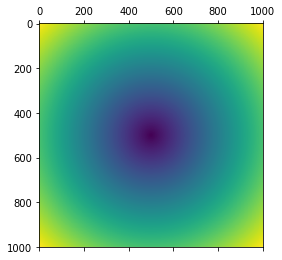

In [673]:
pyplot.matshow(out)

In [684]:
# version étendue
def euclidian_np(data):
    
    shape = data.shape

    notnullcells = np.argwhere(data != 0)
    cmp = np.indices(shape).transpose(1,2,0)
    tmp = notnullcells - cmp[:,:,np.newaxis]
    tmp2 = np.square(tmp).sum(3)
    out = np.sqrt(np.min(tmp2, 2))
    
    return out

In [685]:
data.shape

(1000, 1000)

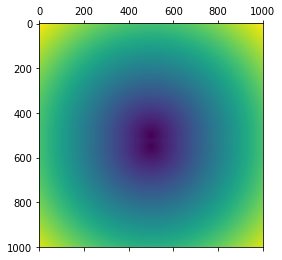

In [683]:
pyplot.matshow(euclidian_np(data))

In [533]:
tmp2.min(1).shape

(1000,)

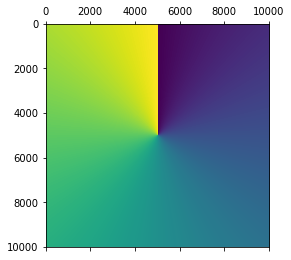

In [445]:
pyplot.matshow(T2)

In [446]:
np.all(np.equal(T1,T2))

ValueError: operands could not be broadcast together with shapes (1000,1000) (10000,10000) 

In [454]:
aa = np.zeros((1, 309, 300))
bb= np.array([0,131,129])

In [463]:
cc=np.indices(aa.shape)

In [465]:
cc

array([[[[  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0],
         ..., 
         [  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0]]],


       [[[  0,   0,   0, ...,   0,   0,   0],
         [  1,   1,   1, ...,   1,   1,   1],
         [  2,   2,   2, ...,   2,   2,   2],
         ..., 
         [306, 306, 306, ..., 306, 306, 306],
         [307, 307, 307, ..., 307, 307, 307],
         [308, 308, 308, ..., 308, 308, 308]]],


       [[[  0,   1,   2, ..., 297, 298, 299],
         [  0,   1,   2, ..., 297, 298, 299],
         [  0,   1,   2, ..., 297, 298, 299],
         ..., 
         [  0,   1,   2, ..., 297, 298, 299],
         [  0,   1,   2, ..., 297, 298, 299],
         [  0,   1,   2, ..., 297, 298, 299]]]])

In [493]:
_,zi,za =  np.split(bb - cc.transpose(1,2,3,0),3, axis=3)

In [500]:
zu = np.squeeze(np.arctan2(zi,za), axis=3)

In [501]:
zu.shape

(1, 309, 300)

ValueError: too many values to unpack (expected 2)

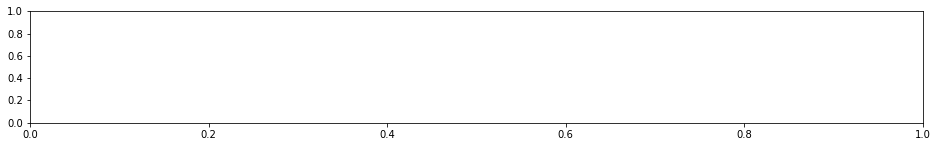

In [499]:
pyplot.matshow(zu)